In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_json("../data/summaries.json").T
data.columns

Index(['date', 'weekday', 'postings', 'new_postings', 'new_companies'], dtype='object')

1390.9473684210527

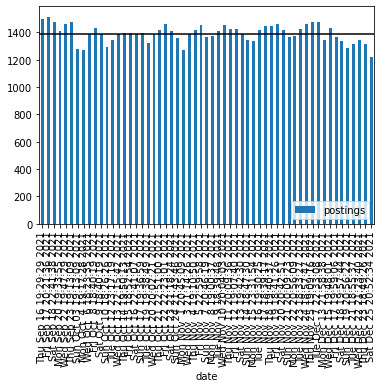

In [3]:
(
    data
    [['date', 'postings']]
    .dropna()
    .plot.bar('date', 'postings')
    .legend(loc='lower right')
)
plt.hlines(data.postings.mean(), -10, 1000, "black")
data.postings.mean()

In [4]:
data.postings.dropna().diff()

2021-09-16     NaN
2021-09-17      15
2021-09-18     -41
2021-09-20     -62
2021-09-22      46
2021-09-23      16
2021-03-10    -199
2021-04-10      -8
2021-06-10     117
2021-08-10      48
2021-09-10     -48
2021-10-10     -90
2021-12-10      50
2021-10-13      45
2021-10-14       4
2021-10-15      -1
2021-10-16      -4
2021-10-17       4
2021-10-19     -67
2021-10-20      62
2021-10-21      31
2021-10-22      42
2021-10-23     -52
2021-10-24     -47
2021-01-11     -90
2021-03-11     116
2021-04-11      27
2021-05-11      42
2021-07-11     -93
2021-08-11      12
2021-09-11      38
2021-10-11      43
2021-11-11     -32
2021-12-11       1
2021-11-13     -41
2021-11-14     -43
2021-11-15      -2
2021-11-16      76
2021-11-17      29
2021-11-18       1
2021-11-19      14
2021-11-20     -40
2021-11-21     -56
2021-11-22      12
2021-11-23      50
2021-11-24      38
2021-11-25       9
2021-07-12       3
2021-12-13    -131
2021-12-15      90
2021-12-17     -66
2021-12-18     -33
2021-12-19  

In [1]:
import requests

In [2]:
res = requests.get("https://staff.am/en/jobs?page=15&per-page=100")

In [3]:
from collections import defaultdict
import numpy as np
import pandas as pd

class CustomDataFrame(pd.DataFrame):

    column_group = defaultdict(list)

    def add_column_group(self, name, columns=None):
        self.column_group[name].extend(columns)

    def get_column_group(self, name):
        return self[self.column_group[name]]

In [6]:
df = CustomDataFrame({
    k: np.random.random(100)
    for k in "ABCDEFG"
})

In [13]:
df.add_column_group("First", list("ABC"))

In [14]:
df.get_column_group("First")

,A,B,C
0,0.889222,0.782168,0.359639
1,0.648945,0.655476,0.933962
2,0.101660,0.908459,0.230290
3,0.300590,0.518520,0.026921
4,0.375385,0.300307,0.130971
...,...,...,...
95,0.036756,0.875255,0.566650
96,0.651880,0.823522,0.357524
97,0.054916,0.393081,0.068363
98,0.486079,0.789210,0.447835


In [15]:
df.column_group["Second"] = list("DEFG")
df.get_column_group("Second")

,D,E,F,G
0,0.756549,0.809315,0.464395,0.663729
1,0.733090,0.540291,0.891713,0.766471
2,0.122039,0.634866,0.528565,0.410792
3,0.651776,0.312677,0.637227,0.784639
4,0.907224,0.084043,0.213037,0.273669
...,...,...,...,...
95,0.175302,0.683808,0.178095,0.336761
96,0.571565,0.042543,0.864803,0.748303
97,0.389141,0.111793,0.994557,0.666080
98,0.059031,0.441942,0.427819,0.308691


In [20]:
df.column_group

defaultdict(list, {'First': ['A', 'B', 'C'], 'Second': ['D', 'E', 'F', 'G']})